In [6]:
from scipy import optimize
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline


In [39]:
#step1 read the filein csv format
diabetes = pd.read_csv("C:/Users/sapph/Desktop/capston_project/diabetes.csv", header = 0, sep = ',' ,index_col = None)
print (diabetes.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [40]:
# Basic EDA of the Dataset.
print(diabetes.info(verbose=True))
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above describe method, we analyse that the min value is zero for more than one columns which means on these columns other than(pregnancies, outcome), a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose  
BloodPressure  
SkinThickness  
Insulin  
BMI  

In [42]:
print(diabetes[diabetes == 0].count())
# print(diabetes[diabetes['Glucose'] == 0])

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [43]:
#step3 clean the data - Aiming to impute 0 values for the columns(Glucose, BloodPressure, SkinThickness, Insulin, BMI) 
#with mean for each class

diabetes['Glucose']= diabetes['Glucose'].replace(0, diabetes['Glucose'].mean())
diabetes['BloodPressure']= diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].mean())
diabetes['SkinThickness']= diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].mean())
diabetes['Insulin']= diabetes['Insulin'].replace(0, diabetes['Insulin'].mean())
diabetes['BMI']= diabetes['BMI'].replace(0, diabetes['BMI'].mean())

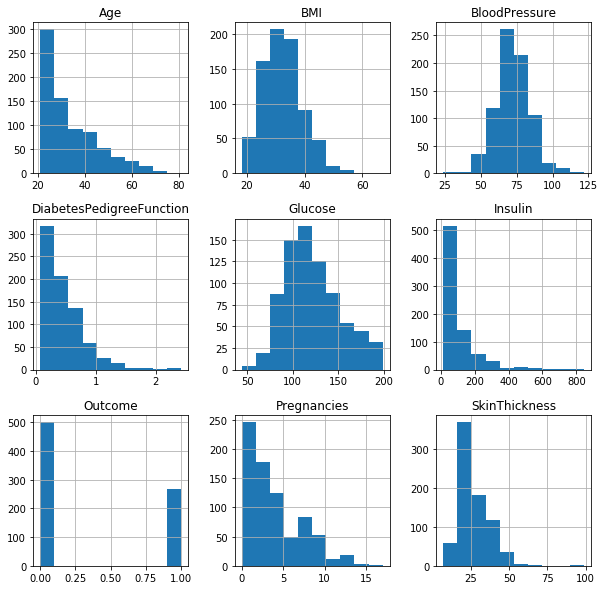

In [45]:
# histogram plotting after replacing zeros or missing values
hist_1 = diabetes.hist(figsize=(10,10))

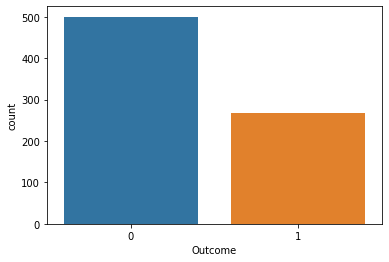

In [55]:
import seaborn as sns
sns.countplot(x='Outcome',data=diabetes)
plt.show()

### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.  
For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

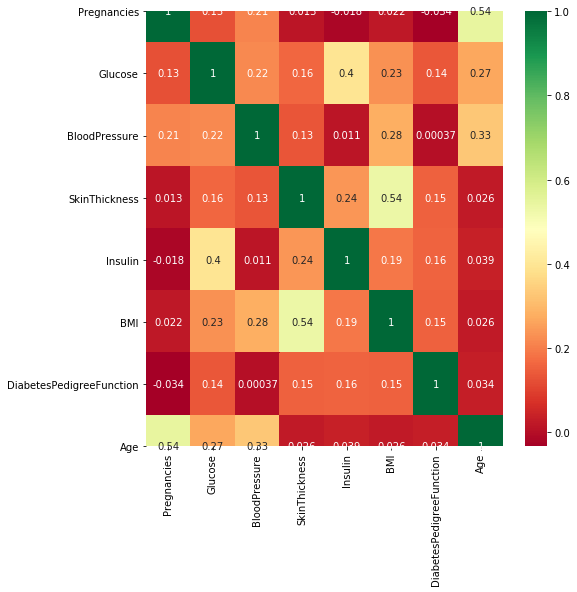

In [59]:
sns.heatmap(diabetes[diabetes.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

From this correlation map we can say that, no two features are corelated.So we cannot eliminate any features just by looking at the correlation matrix.

In [126]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

In [129]:
outcome=diabetes['Outcome']
data=diabetes[diabetes.columns[:8]]
train,test=train_test_split(diabetes,test_size=0.25,random_state=100,stratify=diabetes['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [217]:
abc=[]
roc=[]
classifiers=['Linear Svm','KNN','Decision Tree', 'Random forest', 'gbc', 'adaboost']
models=[svm.SVC(kernel='linear'),KNeighborsClassifier(), DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), GradientBoostingClassifier(random_state= 0), AdaBoostClassifier(random_state=0)]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
    roc.append(metrics.roc_auc_score(prediction,test_Y))
models_df=pd.DataFrame(abc,index=classifiers)   
models_df.columns=['Accuracy' ]
models_df['Roc_auc']= roc
models_df

C:\Users\sapph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Accuracy,Roc_auc
Linear Svm,0.765625,0.748626
KNN,0.723958,0.694673
Decision Tree,0.661458,0.628321
Random forest,0.750000,0.726875
gbc,0.755208,0.730645
adaboost,0.760417,0.737479


#### The above algorithms are not giving a very high accuracy. This can be improved by:
* Using Feature Selection and using only relevant features. we can Standardize the dataset based on this four important feature.

* KNN and Ensemble model optimization

C:\Users\sapph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Glucose                     0.254636
BMI                         0.146041
Age                         0.128070
DiabetesPedigreeFunction    0.126335
BloodPressure               0.097418
Pregnancies                 0.087117
Insulin                     0.083179
SkinThickness               0.077204
dtype: float64
DecisionTree Feature ranking:


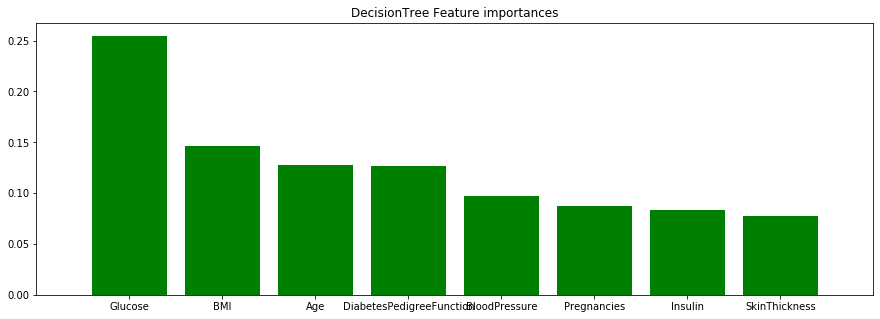

In [231]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(random_state=0)
X=diabetes[diabetes.columns[:8]]
Y=diabetes['Outcome']
feat_names= diabetes.columns[:8]
model.fit(X,Y)
print(pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False))

#Feature Importance
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
print("DecisionTree Feature ranking:")
plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importance[indices], color="green", align="center")
plt.xticks(range(X.shape[1]), feat_names[indices])
plt.xlim([-1, X.shape[1]])
plt.savefig("feature importance.png")
plt.show()

# Optimizing KNN

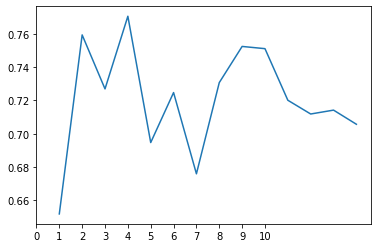

Accuracies for different values of n are: [0.65184147 0.75928144 0.72687459 0.77047655 0.69467319 0.72467614
 0.67591241 0.73065111 0.75235567 0.75102041 0.72006303 0.71180556
 0.71413404 0.7056493 ]


In [218]:
a_index=list(range(1,15))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,15)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.roc_auc_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

# Standardisation

In [162]:
diabetes_std=diabetes[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

 #Standardisation
from sklearn.preprocessing import StandardScaler
features=diabetes_std[diabetes_std.columns[:4]]

# Gaussian Standardisation
features_standard=StandardScaler().fit_transform(features)
std_data=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
std_data['Outcome']=diabetes_std['Outcome']
# outcome=std_data['Outcome']
train1,test1=train_test_split(std_data,test_size=0.25,random_state=0,stratify=std_data['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

In [163]:
abc=[]
roc=[]
classifiers=['Linear Svm','KNN','Decision Tree', 'Random forest', 'gbc', 'adaboost']
models=[svm.SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=4), DecisionTreeClassifier(random_state=0), RandomForestClassifier(random_state=0), GradientBoostingClassifier(random_state= 0), AdaBoostClassifier(random_state=0)]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
    roc.append(metrics.roc_auc_score(prediction,test_Y1))
new_models_df=pd.DataFrame(abc,index=classifiers)   
new_models_df.columns=['New Accuracy']
new_models_df['New_roc']= roc
new_models_df

C:\Users\sapph\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sapph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\sapph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sapph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\sapph\Anaconda3\lib\si

,New Accuracy,New_roc
Linear Svm,0.776042,0.759662
KNN,0.729167,0.712324
Decision Tree,0.708333,0.677372
Random forest,0.807292,0.798309
gbc,0.765625,0.744081
adaboost,0.781250,0.761947


In [164]:
new_models_df=new_models_df.merge(models_df,left_index=True,right_index=True,how='left')
new_models_df['Increase_auc']=new_models_df['New Accuracy']-new_models_df['Accuracy']
new_models_df['Increase_roc']=new_models_df['New_roc']-new_models_df['Roc_auc']
new_models_df
new_models_df

,New Accuracy,New_roc,Accuracy,Roc_auc,Increase_auc,Increase_roc
Linear Svm,0.776042,0.759662,0.765625,0.748626,0.010417,0.011035
KNN,0.729167,0.712324,0.755208,0.770477,-0.026042,-0.058152
Decision Tree,0.708333,0.677372,0.661458,0.628321,0.046875,0.049051
Random forest,0.807292,0.798309,0.750000,0.726875,0.057292,0.071435
gbc,0.765625,0.744081,0.755208,0.730645,0.010417,0.013436
adaboost,0.781250,0.761947,0.760417,0.737479,0.020833,0.024468


##### Result: After Standardisation, we can see there is a increase of ~6% in accuracy and ~7% increase in AUC in Random forest classifier.

# Final Ensemble model

In [212]:

rfc= RandomForestClassifier(random_state=0)
clf_ = rfc.fit(train_X1,train_Y1)
y_pred = clf_.predict(test_X1)
print('Accuracy is {}'.format(metrics.accuracy_score(y_pred, test_Y1)))
print('Roc_auc is {}'.format(metrics.roc_auc_score(y_pred, test_Y1 )))
# y_pred_proba = rfc.predict_proba(test_X1)[:,1]



Accuracy is 0.8072916666666666
Roc_auc is 0.7983091787439612


C:\Users\sapph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sapph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


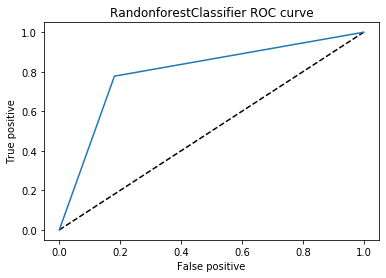

In [232]:
fpr, tpr, thresholds= metrics.roc_curve(y_pred, test_Y1)
plt.figure()
# plt.plot(, )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='RandonForestClassifier')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('RandonforestClassifier ROC curve')
plt.savefig('ROC curve.png')
plt.show()

## Conclusion: After analysing and using different ensemble model, we can predict whether the patients is  diabetic or not with an accuracy of 80.7% and with an AUC of 76.54%